# Page Rank

## ALgoritma Page Rank

Menurut Wikipedia:

Algoritma Page Rank adalah algoritma yang digunakan oleh google search untuk meranking sebuah web pages terhadap hasil penelusuran. Page Rank adalah cara untuk memastikan seuah website tersebut penting atau tidak menurut search engine. Page Rank bekerja dengan cara menghitung jumlah dan kualitas dari link yang mengarah ke web page tersebut untuk menentukan perkiraan seberapa penting web pages tersebut. Bisa diasumsikan dengan semakin penting web pages tersebut mak semakin banyak link yang menuju ke web pages tersebut.

Page Rank adalah algoritma analisa Link yang menandai weightinf secara numerik untuk setiap element sekumpulan hyperlink dari sebuah dokumen. Page Rank dihasilkan dari Algoritma Matematika yaitu web graph yang dipakai seluruh world wide web pages sebagai node, dan hyperlink sebagai edge.

## Konsep Graph

Teori Graph digunakan untuk konsep model dibalik berdirinya search engine, misalnya google search. Algoritma Page Rank dikembangkan oleh founder google yang memakai metode Linear Algebra dan numerik untuk menyelesaikan masalah dari ranking website berdasarkan priority. Sebuah Internet yang terdiri dari banyak webpages yang saling berhubungan yang dimodelkan dalam bentuk graf berarah yang dimana garis-garisnya memiliki arah dimana simpul-simpulnya adalah web pages yang dihubunngkan oleh edges. graph berarah menghubungkan dua simpul/node hanya jika salah satu dari simpul/node tersebut merujuk ke simpul/node lainnya.

Setelah masalah dapat dimodelkan dengan theory graph. Selanjutnya dapat diselesaikan menggunakan algoritma Page Rank menggunakan konsep eigen value dan eigen vektor.

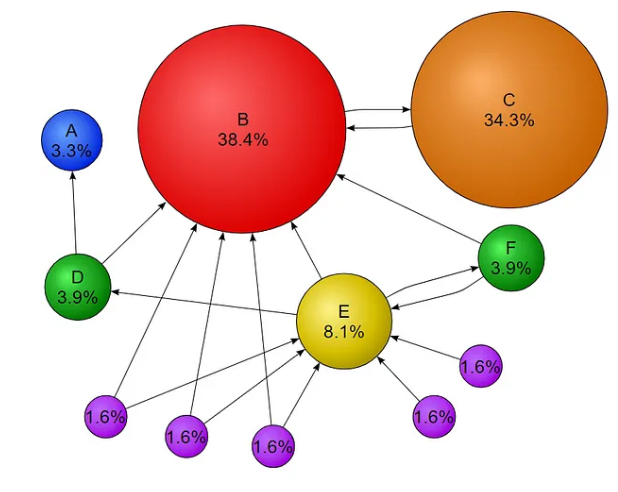

## Komputasi untuk menghitung pagerank

Sebelum kita tahu rumusnya kita harus tahu, bagaimana algoritma Page Rank dihasilkan, dan bagaimana cara memulai algoritma Page Rank?

Jawabanya adalah bahwa Algoritma Page Rank dapat dipandang sebagai Algoritma Iterasi. Algoritma dimmulai dengan menetapkan beberapa nilai awal Page Rank kepada seluruh Web Pages. Algoritma tersebut kemudian diterapkan secara iteratif hingga mencapai kondisi stabil/tetap.  Yaitu, hingga PageRank didistribusikan ke seluruh halaman dan iterasi algoritma berikutnya memberikan sedikit atau tidak ada perubahan lebih lanjut dalam distribusi PageRank. Nilai awal Page Rank merupakan funngsi dari jumlah halaman dalam indeks. Untuk Nilai Page Rank Asli adalah $1/N$ untuk N jumlah halaman dalam indeks. Jadi nilai awal dalam dari sebuah pages/halaman diatur dengan rumus $1/N$.

Contoh :

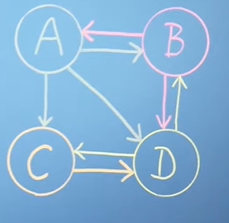

Asumsikan kita mempunyai 4 web pages / halaman web, sebut saja A, B, C, D. Page Rank adalah probabilitas, Jadi kita menetapkan setiap probabilitas awal sebesar 0,25 untuk 4 web pages. Misalkan A menautkan dirinya ke B, C, D, tetapi tidak menautkan dirinya sendiri. Maka vektor pada Link A total terdapat 3 link, yang ditotal mendapatkan nilai 1, jadi bisa kita tulis :

$L(A) = [ { 0, \frac{1}{3} , \frac{1}{3}, \frac{1}{3}} ]$. Begitu juga lainya

$L(B) = [ { \frac{1}{2}, 0 , 0, \frac{1}{2}} ]$

$L(C) = [  0, 0 , 0, 1 ]$

$L(D) = [ { 0, \frac{1}{2} , \frac{1}{2}, 0 }]$


Jadi membentuklah sebuah Matrix (anggap Matrix L):

$
\begin{align*}
L=
\begin{bmatrix}
0 & 0.33 & 0.33 & 0.33\\
0.5 & 0 & 0 & 0.5\\
0 & 0 & 0 & 1\\
0 & 0.5 & 0.5 & 0
\end{bmatrix}
\end{align*}
$

Untuk mengetahui Page Rank awal dari setiap Node adalah dengan mencari Nilai Link yang mengarah ke Node tersebut, Misal Node A Page Ranknya adalah $[0, \frac{1}{2} , 0, 0 ]$ diperoleh hanya dari B yang melinkan dirinya ke A, Karena B hanya melinkan dirinya ke 2 Node (A dan D), maka A mendapat nilai dari B sebesar $1/2$. Begitu juga seterusnya, hingga membentuk membentuk sebuah matrix baru, yaitu kumpulan dari nilai Page Rank awal Node: (dalam desimal)

$
\begin{align*}
PR=
\begin{bmatrix}
0&0.5&0&0\\
0.33&0&0&0.5\\
0.33&0&0&0.5\\
0.33&0.5&1&0
\end{bmatrix}
\end{align*}
$
Matrix ini dapat diperoleh juga dengan menuliskan vektor link Node secara kolom.

Atau rumus untuk mencari setiap Page Rank Node yaitu $ Page Rank(X) = \sum\limits_{j=1}^N L_{Xj} * v_j$ dimana X adalah Node yang dicari Page Rank nya.

Karena tadi nilai probabilitas kasarannya adalah 0,25 sebanyak 4 maka ini juga akan membentuk sebuah matrix, anggap saja matrix v

$
\begin{align*}
v=
\begin{bmatrix}
0.25\\
0.25\\
0.25\\
0.25
\end{bmatrix}
\end{align*}
$

Untuk mengetahui urutan page yang memiliki pengaruh penting atau yang banyak di rujuk oleh page” lainnya di gunakanlah algoritma PageRank dengan mengalikan matrik L dengan v atau dengan rumus $v1 = L*v$. Maka akan membentuk sebuah vektor baru yaitu $v1 = Av$. Perkalian ini dilakukan terus menerus (iteratif) contoh lagi $v2 = L*v1$,  $ v3 = L*v2$ sampai hasil perkalian tetap. Jika tidak memnungkinkan mendapatkan hasil tetap maka kita gunakan toleransi error untuk hasil yang mendekati. Batas toleransi error bisa kita tentukan sendiri, misal 0,01 (semakin kecil semakin hasilnya mendekati). Hasil error tersebut dapat dicari dengan hasil V nantinya di kuadratkan dan di jumlah kemudian di akar harus memiliki nilai <0.01 . Atau $error = \sqrt{V1^2+V2^2+VN}$




## Penerapan Dalam Code Untuk Mencari Page Rank tertinggi

Disini saya akan menggunakan code python unutuk mentukan Page Rank terbaik dari semua web page dari contoh sebelumnya

In [59]:
# import library numpy
import numpy as np
# Membuat Matrix L yang didapat dari outgoing link keempat page
L = np.array([[0,0.33,0.33,0.33],[0.5,0,0,0.5],[0,0,0,1],[0,0.5,0.5,0]])
# Membuat Matrix v yang didapat dari probabilitas semua page
v = np.array([[0.25],[0.25],[0.25],[0.25]])
print(f'Matrix L = \n{L}')
print()
print(f'Matrix v = \n{v}')
print()

# set tolerance
tolerance = 0.001
stop = False
x=1
# inisial v total
vcopy = v.copy()
while not stop:
  print(f'ini adalah perulangan ke {x}')
  v_total = L @ v
  print(f'v{x} = \n{v_total}')
  print()
  # inisial error
  error = 0
  selisihM = v_total - v
  for i in range(len(selisihM)):
    error += selisihM[i][0]**2
  # gunakan error toleransi untuk menghentikan iterasi menggunakan Sum Square Error
  if (error**0.5) < tolerance:
    print(f'error terpenuhi= {error**0.5}')
    print('berhenti !!')
    stop = True
  v = v_total
  x += 1
  print()
print(f'Hasilnya adalah \n{v_total}')

for i in range(len(v_total)-1):
  if v_total[i] > v_total[i+1]:
    result = v_total[i]
    big_node = i + 1
  else:
    result = v_total[i+1]
    big_node  = i + 1 + 1
print(f'Nilai terbesar pages rank adalah {result} pada node ke{big_node}')


Matrix L = 
[[0.   0.33 0.33 0.33]
 [0.5  0.   0.   0.5 ]
 [0.   0.   0.   1.  ]
 [0.   0.5  0.5  0.  ]]

Matrix v = 
[[0.25]
 [0.25]
 [0.25]
 [0.25]]

ini adalah perulangan ke 1
v1 = 
[[0.2475]
 [0.25  ]
 [0.25  ]
 [0.25  ]]


ini adalah perulangan ke 2
v2 = 
[[0.2475 ]
 [0.24875]
 [0.25   ]
 [0.25   ]]


ini adalah perulangan ke 3
v3 = 
[[0.2470875]
 [0.24875  ]
 [0.25     ]
 [0.249375 ]]

error terpenuhi= 0.0007488532900374871
berhenti !!

Hasilnya adalah 
[[0.2470875]
 [0.24875  ]
 [0.25     ]
 [0.249375 ]]
Nilai terbesar pages rank adalah [0.25] pada node ke3
